In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()


In [120]:

# df1 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v1.csv")
# df2 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v2.csv")
# df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v1.csv")
# df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v2.csv")
df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T10:29:53+02:00/v1.csv")
df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T10:29:53+02:00/v2.csv")
df = pd.concat([df1, df2])
df.head(n=30)

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,name,scenario,status,url,extra_tags
0,http_reqs,1663835486,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
1,http_req_duration,1663835486,37.121222,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
2,http_req_blocked,1663835486,14.920059,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
3,http_req_connecting,1663835486,14.748145,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
4,http_req_tls_handshaking,1663835486,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
5,http_req_sending,1663835486,1.245002,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
6,http_req_waiting,1663835486,35.768800,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
7,http_req_receiving,1663835486,0.107420,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
8,http_req_failed,1663835486,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1
9,http_reqs,1663835486,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.32:3000/destinations,version=v1


In [121]:
df_req_durations = df[df["metric_name"] == "http_req_duration"]\
  .groupby(['timestamp', 'extra_tags'])\
  .agg(
    count=('status', 'count'),
    request_duration_median=('metric_value', 'median'),
    request_duration_min=('metric_value', 'min'),
    request_duration_max=('metric_value', 'max')
  ).reset_index()
df_req_durations.rename(columns={'extra_tags': 'version'}, inplace=True)
df_req_durations['version'] = df_req_durations['version'].str.replace('version=', '')
df_req_durations.sort_values("timestamp", inplace=True)
df_req_durations.head(n=10)

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
0,1663835486,v1,143,90.367873,4.757828,341.063000
1,1663835486,v2,135,78.302940,7.750434,342.446970
2,1663835487,v1,176,52.366398,6.838095,190.701848
3,1663835487,v2,177,65.530580,7.875896,317.879875
4,1663835488,v1,184,36.155239,1.519312,131.480955
5,1663835488,v2,180,45.569976,4.384633,189.158407
6,1663835489,v1,173,50.842934,8.503539,125.327261
7,1663835489,v2,167,49.074187,3.606918,158.952473
8,1663835490,v1,178,57.960848,0.292102,209.285335
9,1663835490,v2,177,64.676413,2.301186,189.134863


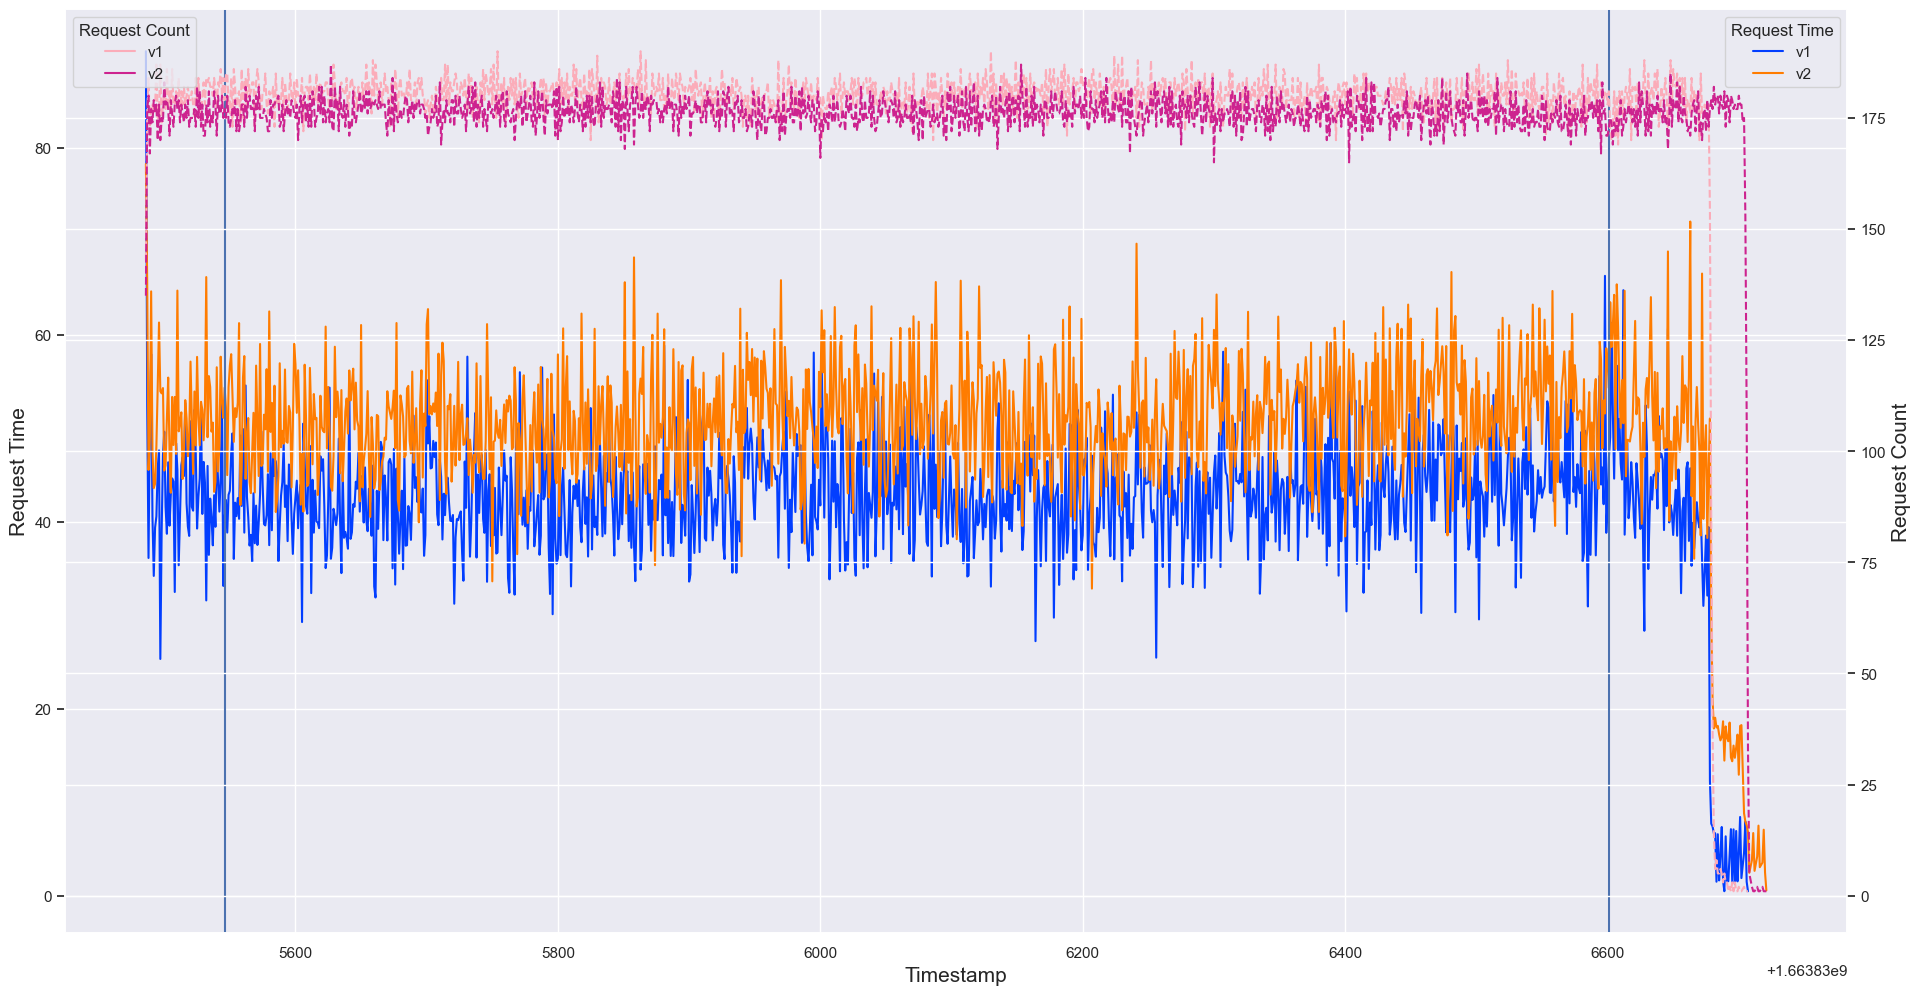

In [122]:
# remove 120 seconds from the last ts
# maxCutoffTs = df_req_durations['timestamp'].max() - 660
maxCutoffTs = df_req_durations['timestamp'].max() - 120
# add 60 seconds to the first ts
minCutoffTs = df_req_durations['timestamp'].min() + 60


# plot
paletteTime = sns.color_palette("bright", 2)
paletteCount = sns.color_palette("RdPu", 2)

sns.set(rc={'figure.figsize':(23,12)})
g = sns.lineplot(data = df_req_durations, x='timestamp', y='request_duration_median', hue='version', palette=paletteTime)
g.axvline(maxCutoffTs)
g.axvline(minCutoffTs)
g.set_xlabel("Timestamp", fontsize = 15)
g.set_ylabel("Request Time", fontsize = 15)
# g.set_ylim([0, 8500])
g.legend(title="Request Time")
ax2 = g.twinx()
ax2.set_ylabel("Request Count", fontsize = 15)
#ax2.set_ylim([0, 2000])
g2 = sns.lineplot(data = df_req_durations, x='timestamp', y='count', hue='version', ax=ax2, palette=paletteCount, linestyle="--")
g2.legend(title="Request Count", loc = 'upper left')

In [123]:
# enforce cutoff
df_filtered = df_req_durations[(df_req_durations['timestamp'] >= minCutoffTs) & (df_req_durations['timestamp'] <= maxCutoffTs)]
df_filtered

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
120,1663835546,v1,179,40.239411,1.764185,113.249344
121,1663835546,v2,177,54.370024,0.405711,174.559439
122,1663835547,v1,185,42.355918,0.821414,99.535791
123,1663835547,v2,175,52.292434,10.300644,122.544093
124,1663835548,v1,185,38.872462,0.909262,114.129518
...,...,...,...,...,...,...
2227,1663836599,v2,171,58.588857,1.504059,185.581806
2228,1663836600,v1,178,42.596505,3.114202,128.394321
2229,1663836600,v2,171,57.125740,3.166980,189.218656
2231,1663836601,v2,173,54.320048,1.269787,184.075048


In [124]:
v1Shape = df_filtered[df_filtered['version'] == 'v1'].shape
v2Shape = df_filtered[df_filtered['version'] == 'v2'].shape
assert v1Shape[0] == v2Shape[0]
measurementIndexesSize = v1Shape[0]
measurementIndexesSize

1056

In [125]:
def bootstrap(perfRuntimes1: pd.DataFrame, perfRuntimes2: pd.DataFrame):
  numberOfSamples = 10000
  allRuntimes1 = perfRuntimes1['request_duration_median'].to_numpy()
  allRuntimes2 = perfRuntimes2['request_duration_median'].to_numpy()
  currentMeasurementIndexes = rng.choice(measurementIndexesSize, size=(measurementIndexesSize, numberOfSamples))

  # Bulk selection
  tmp1 = allRuntimes1[currentMeasurementIndexes]
  tmp1 = np.stack(tmp1, axis=1)
  tmp2 = allRuntimes2[currentMeasurementIndexes]
  tmp2 = np.stack(tmp2, axis=1)

  # Get median for both lists
  med1 = np.median(tmp1, axis=1)
  med2 = np.median(tmp2, axis=1)
  R = med2/med1
  R.sort()

  CIsmall = 1 # 99% confidence interval
  small = int((numberOfSamples * CIsmall) / 100 / 2)
  if small == 0: small = 1
  minSmall = R[small-1]
  minSmall = (minSmall - 1) * 100
  maxSmall = R[numberOfSamples-small-1]
  maxSmall = (maxSmall - 1) * 100
  instability = maxSmall - minSmall
  return minSmall, maxSmall, instability

In [126]:
runtimes1 = df_filtered[df_filtered["version"] == 'v1']
runtimes2 = df_filtered[df_filtered["version"] == 'v2']
median1 = runtimes1['request_duration_median'].median()
median2 = runtimes2['request_duration_median'].median()
change = ((median2/median1) - 1) * 100
minci, maxci, instability = bootstrap(runtimes1, runtimes2)
assert maxci >= change
assert change >= minci
print(f"performance change: {change:.2f}% [{minci:.2f} - {maxci:.2f}] ({instability:.2f}%)")

performance change: 18.87% [17.01 - 20.46] (3.44%)
